In [27]:
df

,tag,port,avg_receive_packet_duration,avg_receive_packet_size,avg_send_packet_duration,avg_send_packet_size,max_receive_packet_duration,max_receive_packet_size,max_receive_sequence_packet_count,max_send_packet_duration,...,stddev_receive_packet_size,stddev_send_packet_duration,stddev_send_packet_size,0,1,2,3,4,5,6
0,None,443,708.166667,874.500000,1343.750000,91.500000,2540,1288,4,6500,...,458.788622,2143.566704,83.815273,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,None,443,101.250000,400.200000,148.714286,592.000000,276,1133,5,263,...,496.192201,127.963164,421.009501,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,None,443,64.166667,704.333333,2068.000000,273.666667,120,1381,3,13996,...,624.206163,5260.053073,210.238753,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,None,443,62.000000,94.500000,93.166667,205.000000,173,144,4,216,...,70.003571,100.232563,175.034282,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,None,53,103.000000,-1.000000,5.000000,-1.000000,103,-1,2,5,...,-0.000000,0.000000,-0.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6544,None,443,47.292308,459.222222,39.987952,1283.473684,586,1388,9,579,...,534.130082,89.829445,340.375223,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6545,None,443,79.125000,287.000000,63.300000,156.750000,214,782,4,161,...,428.717856,56.619686,252.258300,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6546,None,1194,70.168831,1071.794872,84.338028,184.388889,1597,1301,16,1641,...,460.306627,242.350098,285.983874,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6547,None,443,65.142857,680.333333,9080.500000,591.250000,110,1388,3,72109,...,674.415549,25467.460819,571.470253,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
array = df.values
X = array[:,1:]
Y = array[:,0]

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [48]:
rescaledX = scaler.fit_transform(X)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split( 
    rescaledX, Y, test_size = 0.3, random_state = 100)

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=2, min_samples_leaf=4)

In [53]:
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=4, random_state=100)

In [54]:
y_pred = clf_gini.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [56]:
confusion_matrix(y_test, y_pred)

array([[1864,    2],
       [  77,   22]])

In [57]:
 accuracy_score(y_test,y_pred)*100

95.9796437659033

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        None       0.96      1.00      0.98      1866
   instagram       0.92      0.22      0.36        99

    accuracy                           0.96      1965
   macro avg       0.94      0.61      0.67      1965
weighted avg       0.96      0.96      0.95      1965



In [41]:
 y_prob=clf_gini.predict_proba(X_test)

In [42]:
from sklearn.metrics import plot_precision_recall_curve

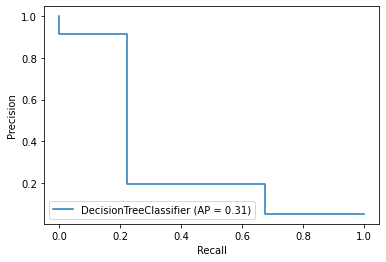

In [43]:
disp = plot_precision_recall_curve(clf_gini, X_test, y_test)

In [44]:
from sklearn.tree import export_graphviz


In [ ]:
export_graphviz(
clf_gini,
out_file=dot_data,
feature_names=['avg_receive_packet_duration', 'avg_receive_packet_size',
       'avg_send_packet_duration', 'avg_send_packet_size',
       'max_receive_packet_duration', 'max_receive_packet_size',
       'max_receive_sequence_packet_count', 'max_send_packet_duration',
       'max_send_packet_size', 'max_send_sequence_packet_count',
       'min_receive_packet_duration', 'min_receive_packet_size',
       'min_send_packet_duration', 'min_send_packet_size',
       'stddev_receive_packet_duration', 'stddev_receive_packet_size',
       'stddev_send_packet_duration', 'stddev_send_packet_size'],
class_names=['ins','null'],
rounded=True,
filled=True
)